In [6]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [7]:
df = pd.read_csv('COVID clinical trials.csv')


First 5 rows:
   Rank   NCT Number                                              Title  \
0     1  NCT04785898  Diagnostic Performance of the ID Now™ COVID-19...   
1     2  NCT04595136  Study to Evaluate the Efficacy of COVID19-0001...   
2     3  NCT04395482  Lung CT Scan Analysis of SARS-CoV2 Induced Lun...   
3     4  NCT04416061  The Role of a Private Hospital in Hong Kong Am...   
4     5  NCT04395924         Maternal-foetal Transmission of SARS-Cov-2   

        Acronym                  Status         Study Results  \
0   COVID-IDNow  Active, not recruiting  No Results Available   
1      COVID-19      Not yet recruiting  No Results Available   
2   TAC-COVID19              Recruiting  No Results Available   
3      COVID-19  Active, not recruiting  No Results Available   
4  TMF-COVID-19              Recruiting  No Results Available   

                                          Conditions  \
0                                            Covid19   
1                               

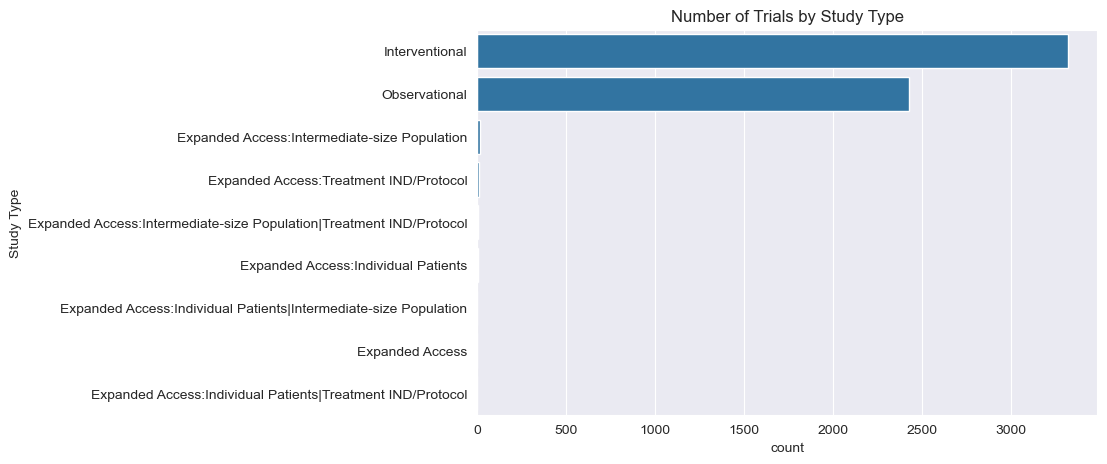

In [8]:
# ---------------- EDA ----------------
print("First 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing values:")
print(df.isnull().sum())

print("\nUnique values per column:")
print(df.nunique())

# Drop irrelevant or mostly-null columns
df = df.dropna(axis=1, thresh=len(df)*0.5)  # Drop columns with >50% missing
df = df.drop_duplicates()

# Check target-like columns
print("\nValue counts for some potentially important columns:")
for col in df.columns:
    if df[col].nunique() < 10:
        print(f"\n{col}:\n{df[col].value_counts()}")

# Plot Study Type distribution
if 'Study Type' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, y='Study Type', order=df['Study Type'].value_counts().index)
    plt.title('Number of Trials by Study Type')
    plt.show()


In [9]:
# ---------------- Data Preprocessing ----------------

# Select a basic classification task
# Example: Predict whether the study is "Interventional" or not
if 'Study Type' in df.columns:
    df['Target'] = df['Study Type'].apply(lambda x: 1 if x == 'Interventional' else 0)
else:
    raise ValueError("Study Type column not found. Cannot define target.")

# Drop unused columns
drop_cols = ['NCT Number', 'Study Type'] if 'NCT Number' in df.columns else ['Study Type']
df = df.drop(columns=drop_cols)

# Handle categorical columns
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna('Unknown')
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Handle numeric columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())


--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       489
           1       1.00      1.00      1.00       668

    accuracy                           1.00      1157
   macro avg       1.00      1.00      1.00      1157
weighted avg       1.00      1.00      1.00      1157


Accuracy Score: 1.0


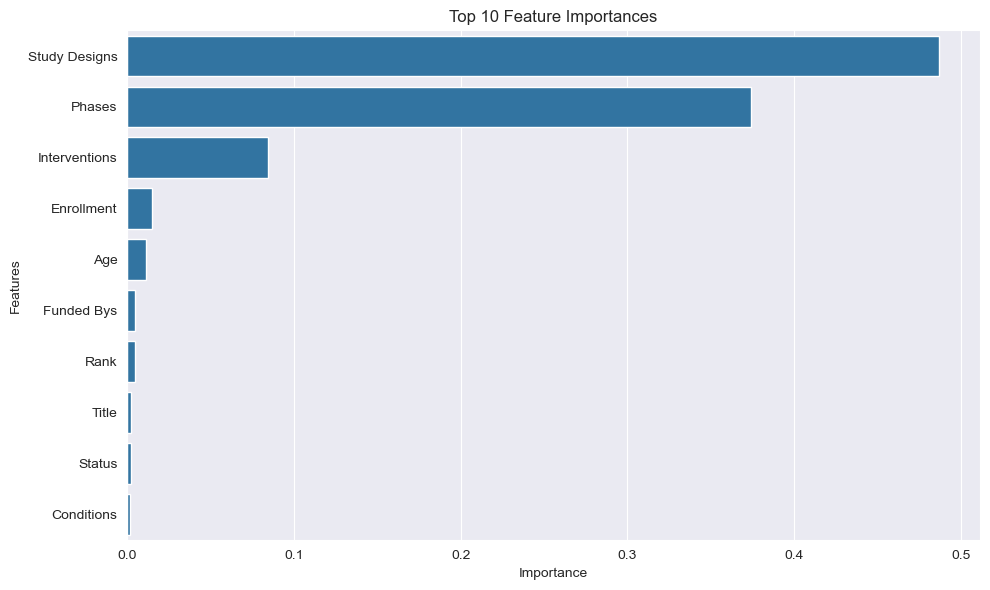

In [10]:
# ---------------- ML Model ----------------

# Define features and target
X = df.drop(columns=['Target'])
y = df['Target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# ---------------- Feature Importance ----------------
importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()